This example was taken from the book **The Essence of Chaos** by *Edward Lorenz*. The aim of the model he preseted in that chapter is to show how we can construct parsimoniuos models from real case phenomenoms which exhibit chaos. 

The model consists of a board that goes down a regularly-bumpy slope or moguls without any control of the direction whatso ever. The dynamical system of this board is decribed by the system of ODE shown bellow

$$\frac{dx}{dt} = U, \quad \frac{dx}{dt} = V, \quad \frac{dz}{dt} = W.$$

\begin{align}
\frac{du}{dt} &= -F \partial_x H - cu, \\
\frac{dv}{dt} &= -F \partial_y H - cv, \\
\frac{dw}{dt} &= -g + F - cw.
\end{align}

\begin{align}
\frac{d \vec{u}}{dt} &= -F \nabla_H H - c \vec{u}.\\
\end{align}


$\vec{x} = (x,y,z)$ are the spacial coordinates and $\vec{u} = (u,v,w)$ are the components of the velocity of the board. And $H$ is the shape pf the slope that is parameterized by the following expression: 

$$H(x,y) = -ax - b \ cos(px) \ cos(qy).$$

Our first goal is to solve the ODE system for a given initial condition using numerical integration method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We can plot the shape of the moguls to help us understand better the problem. For this we use the parameters that Lorenz suggest in his book, in which $a$ is the anlge of the slope, $b$ is the depth of the moguls, and $p$ and $q$ are the spatial frequencies of the moguls in the $x$ and $y$ directions. 

In [13]:
a = 0.25
b = 0.4
q = (2*np.pi)/4.0
p = (2*np.pi)/10.0

def H_func(x,y):
    """
    Function that parametrizes the moguls. 
    It takes a given x and y position as arguments, and returns 
    the height of the slope.
    """
    return -a*x - b*np.cos(p*x)*np.cos(q*y) 

def pits_n_crests(x,y):
    """
    Function that parametrizes the moguls without the slope. 
    It takes a given x and y position as arguments, and returns 
    the heights of the moguls as if they were in a flat surface.
    """
    return - b*np.cos(p*x)*np.cos(q*y) 

In [3]:
x_range = np.linspace(0, 20, 200)
y_range = np.linspace(-10, 10, 200)
XX, YY = np.meshgrid(x_range, y_range)
moguls = H_func(XX, YY)

In [4]:
from mpl_toolkits.mplot3d import Axes3D

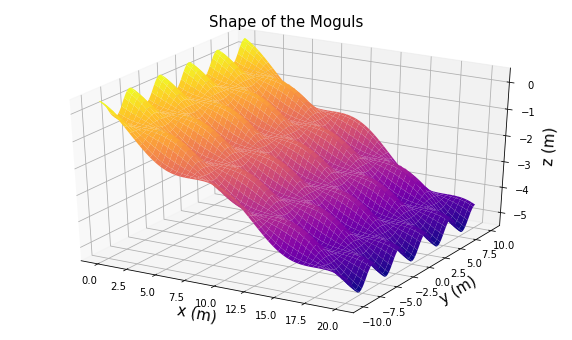

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.set_ylabel('y (m)', fontsize = 15)
ax.set_xlabel('x (m)', fontsize = 15)
ax.set_zlabel('z (m)', fontsize = 15)
ax.set_title('Shape of the Moguls', fontsize = 15)

ax.plot_surface(XX, YY, moguls, cmap = 'plasma')

**Quite cool so far!** I ❤ matplotlib.

In [6]:
from scipy.integrate import solve_ivp

In [10]:
def sled(t, X_0):
    
    x0 = np.copy(X_0[0])
    y0 = np.copy(X_0[1])
    u0 = np.copy(X_0[2])
    v0 = np.copy(X_0[3])
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p**2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q**2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0**2 + 2*H_xy*u0*v0 + H_yy*v0**2)/(1 + H_x**2 + H_y**2)
    
    dU = -F*H_x - c*u0
    dV = -F*H_y - c*v0
    
    return np.array([u0, v0, dU, dV])

In [11]:
t_f = 15

sol_1 = solve_ivp(sled, [0, t_f], [0,-0.1,4,2])
sol_2 = solve_ivp(sled, [0, t_f], [0,0.0,4,2])
sol_3 = solve_ivp(sled, [0, t_f], [0,0.1,4,2])
sol_4 = solve_ivp(sled, [0, t_f], [0,0.2,4,2])

Text(0.5, 0, 'y - Crossslope position (m)')

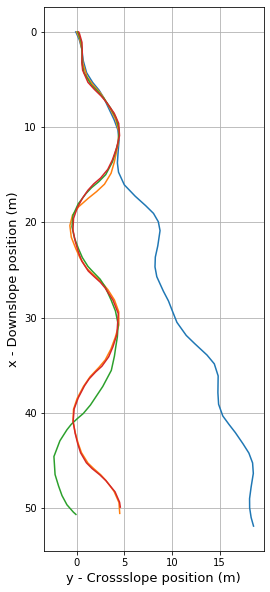

In [12]:
plt.figure(figsize=(5,10))
plt.plot(sol_1.y[1], sol_1.y[0])
plt.plot(sol_2.y[1], sol_2.y[0])
plt.plot(sol_3.y[1], sol_3.y[0])
plt.plot(sol_4.y[1], sol_4.y[0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.ylabel('x - Downslope position (m)', fontsize =13)
plt.xlabel('y - Crossslope position (m)', fontsize =13)

The previous system is not compact, i.e., $X$ and $Y$ can grow infinitidly. 

Text(0.5, 0, 'y - Crossslope position (m)')

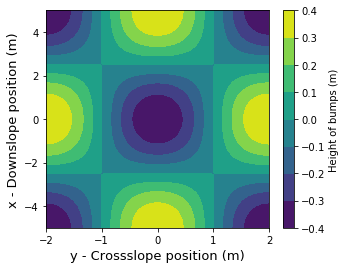

In [11]:
x_range_compact = np.linspace(-5, 5, 50)
y_range_compact = np.linspace(-2, 2, 50)
XX_c, YY_c = np.meshgrid(x_range_compact, y_range_compact)

moguls_compact = pits_n_crests(XX_c, YY_c)

plt.figure(figsize=(5,4))
plt.contourf(YY_c, XX_c, moguls_compact)
plt.colorbar(label = 'Height of bumps (m)')
plt.ylabel('x - Downslope position (m)', fontsize =13)
plt.xlabel('y - Crossslope position (m)', fontsize =13)

In [12]:
def compactor(x, lower_bound, upper_bound):
    
    if x > upper_bound: 
        return x%upper_bound - upper_bound
    elif x < lower_bound: 
        return x%lower_bound - lower_bound
    else: 
        return x

In [13]:
compactor(2.6, -2.5, 2.5)

-2.4

In [14]:
def sled_u_cst(t, X_0):
    
    x0 = np.copy(X_0[0])
    y0 = np.copy(X_0[1])
    u0 = np.copy(X_0[2])
    v0 = np.copy(X_0[3])
    
    g = 9.81
    c = 0.5
    a = 0.25
    #b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p**2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q**2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0**2 + 2*H_xy*u0*v0 + H_yy*v0**2)/(1 + H_x**2 + H_y**2)
    
    dU = 0
    dV = -F*H_y - c*v0
    
    return np.array([u0, v0, dU, dV])

for the compact model I need to write my own RK function

In [15]:
def runge_kutta_step(f, x0, dt, t=None):
       
    k1 = f(t, x0) * dt
    k2 = f(t, x0 + k1/2) * dt
    k3 = f(t, x0 + k2/2) * dt
    k4 = f(t, x0 + k3) * dt
    x_new = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return x_new


In [16]:
runge_kutta_step(sled_u_cst, [0.2,0.2,0.0,0.], 0.1)

array([ 0.2       ,  0.19149216,  0.        , -0.16772729])

In [17]:
def solver_compact(f, x0, y0, v0, u0, dt, N_t, N, b = 0.5):
    
    solution = np.zeros((3, N_t+1, N))
    solution[0,0, :] = x0
    solution[1,0, :] = y0
    solution[2,0, :] = v0
    
    for i in range(1, N_t + 1):
        for k in range(N):
            
            x_0_step = np.insert(solution[:, i-1, k], 2, u0)
            
            aux = runge_kutta_step(f, x_0_step, dt, b)
            solution[0, i, k] = compactor(aux[0], -5, 5)
            solution[1, i, k] = compactor(aux[1], -2, 2)
            solution[2, i, k] = aux[3]
            
    return solution

def solver(f, x0, y0, v0, u0, dt, N_t, N, b = 0.5):
    
    solution = np.zeros((4, N_t+1, N))
    solution[0,0, :] = x0
    solution[1,0, :] = y0
    solution[2,0,: ] = u0
    solution[3,0, :] = v0
    
    for i in range(1, N_t + 1):
        for k in range(N):
            
            x_0_step = solution[:, i-1, k]
            solution[:, i, k] = runge_kutta_step(f, x_0_step, dt, b)
         
    return solution

In [18]:
n_sleds = 1000
n_time = 1000
x_init = np.zeros(n_sleds)
y_init = np.random.rand(n_sleds)*4 - 2
v_init = np.random.rand(n_sleds)*10 - 5

sol_u_const = solver_compact(sled_u_cst, x_init, y_init, v_init, 3.5, 0.01, n_time, n_sleds)

Text(-0.01, 0.5, 'v - Cross slope velocity (m/s)')

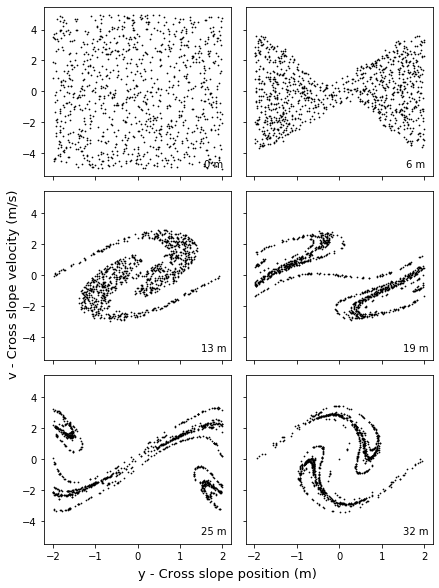

In [19]:
time_steps = range(0,1000, 180)

fig, axes = plt.subplots(3, 2, sharex=True, sharey= True, figsize = (6,8))
axes = axes.reshape(6)

for i, j in enumerate(time_steps):
    
    dist = round(j*(3.5*0.01))
    axes[i].scatter(sol_u_const[1, j, :], sol_u_const[2, j, :], s = 0.5, color = 'k')
    axes[i].text(1.8,-4.9, '{} m'.format(dist) , ha='center')
    
plt.tight_layout()
fig.text(0.5, -0.01, 'y - Cross slope position (m)', ha='center', fontsize = 13)
fig.text(-0.01, 0.5, 'v - Cross slope velocity (m/s)', va='center', rotation='vertical', fontsize = 13)

In [20]:
n_sleds = 15
n_time = 1000
x_init = np.zeros(n_sleds)
y_init = np.random.rand(n_sleds)/2
v_init = np.zeros(n_sleds)
u_init = np.zeros(n_sleds) + 3.5

sol_not_compact = solver(sled_u_cst, x_init, y_init, v_init, u_init, 0.01, n_time, n_sleds)

Text(0.5, 0, 'y - Crossslope position (m)')

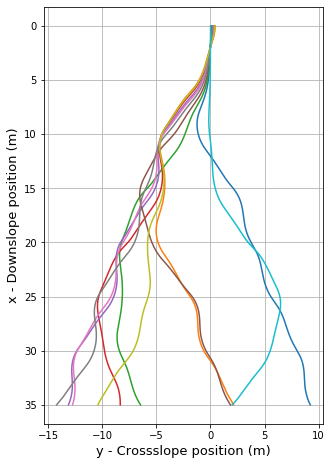

In [21]:
plt.figure(figsize=(5,10))

for i in range(10):
    plt.plot(sol_not_compact[1,:, i], sol_not_compact[0,:, i])

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.ylabel('x - Downslope position (m)', fontsize =13)
plt.xlabel('y - Crossslope position (m)', fontsize =13)

# Routes from chaos

In [22]:
n_sleds = 1
n_time = 5000
x_init = np.zeros(n_sleds)
y_init = np.random.rand(n_sleds)
v_init = np.zeros(n_sleds)
u_init = np.zeros(n_sleds) + 3.5

one_element = solver(sled, x_init, y_init, v_init, u_init, 0.01, n_time, n_sleds, b = 0.5)

In [23]:
print('min: ', one_element[3,1000:].min())
print('max: ', one_element[3,1000:].max())

min:  -3.7372199060458784
max:  3.886557813753392


Text(0.5, 0, 'y - Crossslope position (m)')

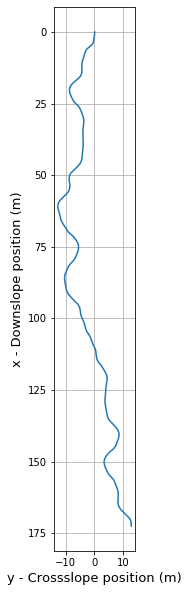

In [24]:
plt.figure(figsize=(5,10))

plt.plot(one_element[1,:], one_element[0,:])

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.ylabel('x - Downslope position (m)', fontsize =13)
plt.xlabel('y - Crossslope position (m)', fontsize =13)

In [77]:
a

array([0.28689922, 0.71068557, 0.79045908, 0.83136826])

In [82]:
a[-1]

0.8313682569883628

In [84]:
b_range = np.linspace(0, 0.6, 500)
max_speed = np.array([])
b_array = np.array([])

k_transient = 1700
n_extremes = 2

n_sleds = 1
n_time = 2000
x_init = np.zeros(n_sleds)
y_init = np.random.rand(n_sleds)
v_init = np.zeros(n_sleds)
u_init = np.zeros(n_sleds) + 3

for b_i in b_range:
    
    step_solution = solver(sled, x_init, y_init, v_init, u_init, 0.01, n_time, n_sleds, b_i)
    
    v_step = step_solution[3, k_transient:]
    v_step.sort()
    v_step = v_step[:n_extremes] + v_step[-n_extremes:]
    
    b_step = np.zeros_like(v_step) + b_i
    
    max_speed = np.append(max_speed, v_step)
    b_array = np.append(b_array, b_step)

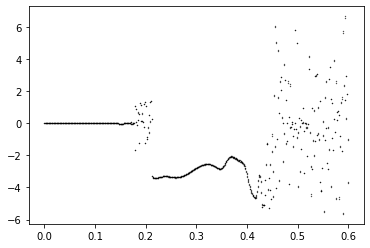

In [85]:
plt.scatter(b_array, max_speed, s = 0.1, color = 'k')

![](https://i.kym-cdn.com/entries/icons/original/000/028/021/work.jpg)